In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("E-commerce Customer Behavior - Sheet1.csv")
df

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...,...
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral


In [4]:
df.head(10)

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
5,106,Female,37,Houston,Bronze,440.80,8,3.1,False,22,Neutral
6,107,Female,31,New York,Gold,1150.60,15,4.5,True,28,Satisfied
7,108,Male,35,Los Angeles,Silver,800.90,12,4.2,False,14,Neutral
8,109,Female,41,Chicago,Bronze,495.25,10,3.6,True,40,Unsatisfied
9,110,Male,28,San Francisco,Gold,1520.10,21,4.8,False,9,Satisfied


In [5]:
df.tail(10)

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
340,441,Female,37,Houston,Bronze,450.80,7,3.4,False,32,Neutral
341,442,Female,31,New York,Gold,1140.60,15,4.5,True,36,Satisfied
342,443,Male,35,Los Angeles,Silver,800.90,12,4.1,False,20,Neutral
343,444,Female,41,Chicago,Bronze,475.25,9,3.6,True,48,Unsatisfied
344,445,Male,28,San Francisco,Gold,1480.10,21,4.9,False,13,Satisfied
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral
349,450,Female,43,Chicago,Bronze,515.75,10,3.3,True,49,Unsatisfied


In [6]:
df.info

<bound method DataFrame.info of      Customer ID  Gender  Age           City Membership Type  Total Spend  \
0            101  Female   29       New York            Gold      1120.20   
1            102    Male   34    Los Angeles          Silver       780.50   
2            103  Female   43        Chicago          Bronze       510.75   
3            104    Male   30  San Francisco            Gold      1480.30   
4            105    Male   27          Miami          Silver       720.40   
..           ...     ...  ...            ...             ...          ...   
345          446    Male   32          Miami          Silver       660.30   
346          447  Female   36        Houston          Bronze       470.50   
347          448  Female   30       New York            Gold      1190.80   
348          449    Male   34    Los Angeles          Silver       780.20   
349          450  Female   43        Chicago          Bronze       515.75   

     Items Purchased  Average Rating  Disco

In [7]:
df.shape

(350, 11)

In [8]:
df.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


In [9]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
345    False
346    False
347    False
348    False
349    False
Length: 350, dtype: bool

In [10]:
df["City"].unique()

array(['New York', 'Los Angeles', 'Chicago', 'San Francisco', 'Miami',
       'Houston'], dtype=object)

In [11]:
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [12]:
df.isna().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

In [13]:
df[df["Satisfaction Level"].isnull()]

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
71,172,Female,37,Houston,Bronze,420.8,7,3.1,False,21,NaN
143,244,Female,37,Houston,Bronze,430.8,7,3.4,False,23,NaN


In [14]:
df[df["City"]=="Houston"]

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
5,106,Female,37,Houston,Bronze,440.8,8,3.1,False,22,Neutral
11,112,Female,36,Houston,Bronze,470.5,7,3.2,False,20,Neutral
17,118,Female,38,Houston,Bronze,450.9,8,3.0,False,25,Neutral
23,124,Female,37,Houston,Bronze,430.8,7,3.4,False,23,Neutral
29,130,Female,36,Houston,Bronze,460.5,8,3.1,False,19,Neutral
35,136,Female,38,Houston,Bronze,440.9,8,3.2,False,24,Neutral
41,142,Female,37,Houston,Bronze,420.8,7,3.1,False,21,Neutral
47,148,Female,36,Houston,Bronze,470.5,8,3.0,False,18,Neutral
53,154,Female,37,Houston,Bronze,430.8,7,3.4,False,23,Neutral
59,160,Female,36,Houston,Bronze,460.5,8,3.1,False,19,Neutral


In [15]:
df["Satisfaction Level"] = df["Satisfaction Level"].fillna("Neutral")

In [16]:
df.iloc[71]

Customer ID                     172
Gender                       Female
Age                              37
City                        Houston
Membership Type              Bronze
Total Spend                   420.8
Items Purchased                   7
Average Rating                  3.1
Discount Applied              False
Days Since Last Purchase         21
Satisfaction Level          Neutral
Name: 71, dtype: object

In [17]:
df.iloc[143]

Customer ID                     244
Gender                       Female
Age                              37
City                        Houston
Membership Type              Bronze
Total Spend                   430.8
Items Purchased                   7
Average Rating                  3.4
Discount Applied              False
Days Since Last Purchase         23
Satisfaction Level          Neutral
Name: 143, dtype: object

In [18]:
df['Gender'].value_counts()

Gender
Female    175
Male      175
Name: count, dtype: int64

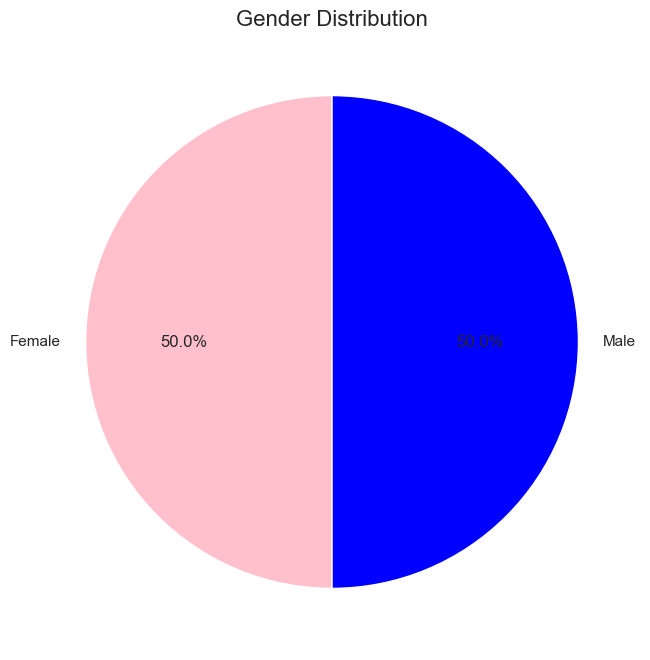

In [19]:
# Set the plot style
sns.set(style="whitegrid")

# Gender count pie chart
plt.figure(figsize=(8, 8))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['pink', 'blue'], startangle=90)
plt.title('Gender Distribution', fontsize=16)
plt.ylabel('')  # Hide the y-axis label
plt.show()

In [20]:
df['Age'].value_counts()

Age
30    48
32    33
43    25
27    25
31    25
35    25
36    25
34    24
37    24
41    24
28    24
29    11
33    10
42     9
26     9
38     9
Name: count, dtype: int64

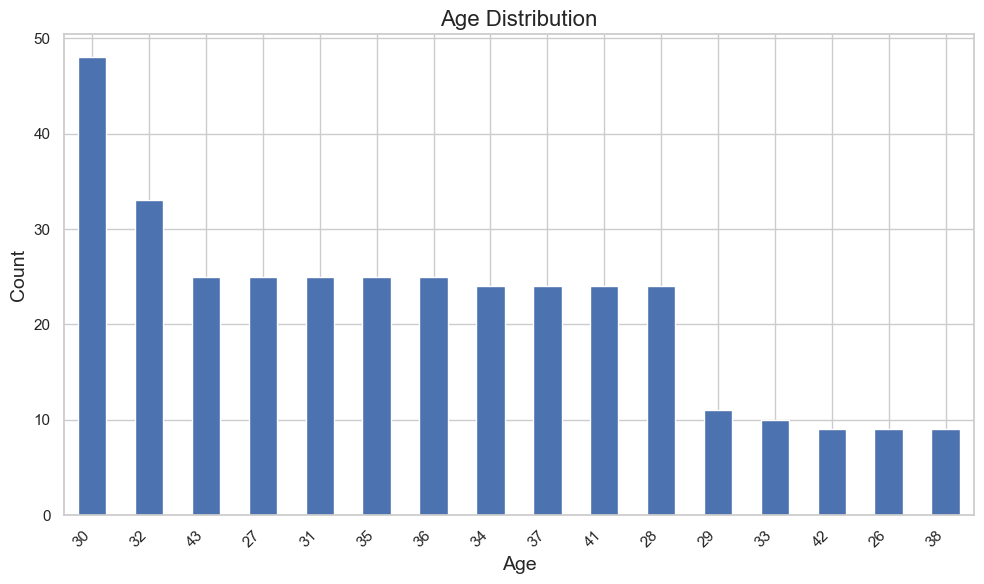

In [21]:
plt.figure(figsize=(10, 6))
df['Age'].value_counts().plot(kind='bar')
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [22]:
df['Membership Type'].value_counts()

Membership Type
Gold      117
Silver    117
Bronze    116
Name: count, dtype: int64

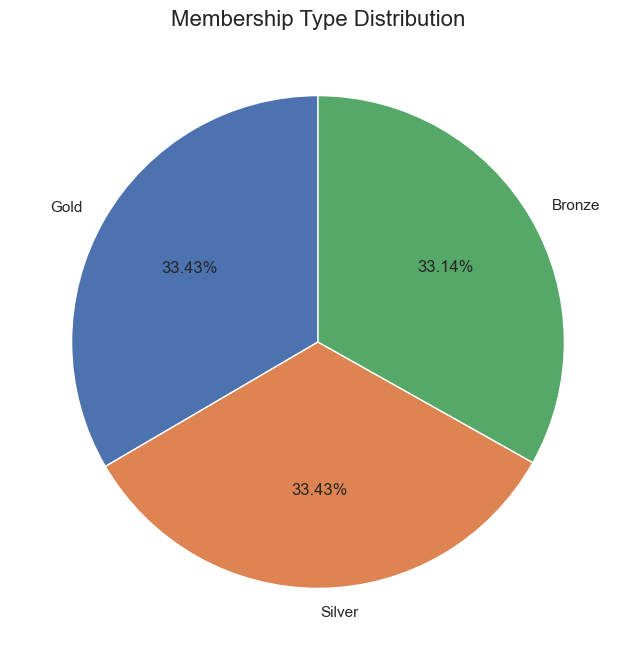

In [23]:
plt.figure(figsize=(8, 8))
df['Membership Type'].value_counts().plot(kind='pie', autopct='%1.2f%%', startangle=90)
plt.title('Membership Type Distribution', fontsize=16)
plt.ylabel('')
plt.show()

In [24]:
df['Satisfaction Level'].value_counts()

Satisfaction Level
Satisfied      125
Unsatisfied    116
Neutral        109
Name: count, dtype: int64

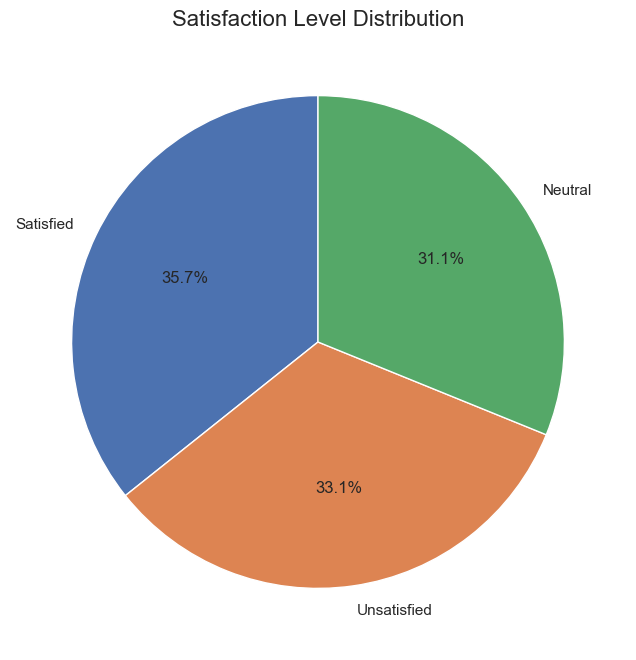

In [25]:
plt.figure(figsize=(8, 8))
df['Satisfaction Level'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Satisfaction Level Distribution', fontsize=16)
plt.ylabel('') 
plt.show()

In [26]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

df = pd.get_dummies(df, columns=['City'], drop_first=True)

df['Satisfaction Level'] = df['Satisfaction Level'].map({'Unsatisfied': 0, 'Neutral': 1, 'Satisfied': 2})
df

,Customer ID,Gender,Age,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,City_Houston,City_Los Angeles,City_Miami,City_New York,City_San Francisco
0,101,1,29,Gold,1120.20,14,4.6,True,25,2,False,False,False,True,False
1,102,0,34,Silver,780.50,11,4.1,False,18,1,False,True,False,False,False
2,103,1,43,Bronze,510.75,9,3.4,True,42,0,False,False,False,False,False
3,104,0,30,Gold,1480.30,19,4.7,False,12,2,False,False,False,False,True
4,105,0,27,Silver,720.40,13,4.0,True,55,0,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,446,0,32,Silver,660.30,10,3.8,True,42,0,False,False,True,False,False
346,447,1,36,Bronze,470.50,8,3.0,False,27,1,True,False,False,False,False
347,448,1,30,Gold,1190.80,16,4.5,True,28,2,False,False,False,True,False
348,449,0,34,Silver,780.20,11,4.2,False,21,1,False,True,False,False,False


In [27]:
label_encoder = LabelEncoder()
df['Membership Type'] = label_encoder.fit_transform(df['Membership Type'])
df

,Customer ID,Gender,Age,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,City_Houston,City_Los Angeles,City_Miami,City_New York,City_San Francisco
0,101,1,29,1,1120.20,14,4.6,True,25,2,False,False,False,True,False
1,102,0,34,2,780.50,11,4.1,False,18,1,False,True,False,False,False
2,103,1,43,0,510.75,9,3.4,True,42,0,False,False,False,False,False
3,104,0,30,1,1480.30,19,4.7,False,12,2,False,False,False,False,True
4,105,0,27,2,720.40,13,4.0,True,55,0,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,446,0,32,2,660.30,10,3.8,True,42,0,False,False,True,False,False
346,447,1,36,0,470.50,8,3.0,False,27,1,True,False,False,False,False
347,448,1,30,1,1190.80,16,4.5,True,28,2,False,False,False,True,False
348,449,0,34,2,780.20,11,4.2,False,21,1,False,True,False,False,False


In [28]:
df['Age Group'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 55, 100], labels=['18-25', '26-35', '36-45', '46-55', '56+'])
df

,Customer ID,Gender,Age,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,City_Houston,City_Los Angeles,City_Miami,City_New York,City_San Francisco,Age Group
0,101,1,29,1,1120.20,14,4.6,True,25,2,False,False,False,True,False,26-35
1,102,0,34,2,780.50,11,4.1,False,18,1,False,True,False,False,False,26-35
2,103,1,43,0,510.75,9,3.4,True,42,0,False,False,False,False,False,36-45
3,104,0,30,1,1480.30,19,4.7,False,12,2,False,False,False,False,True,26-35
4,105,0,27,2,720.40,13,4.0,True,55,0,False,False,True,False,False,26-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,446,0,32,2,660.30,10,3.8,True,42,0,False,False,True,False,False,26-35
346,447,1,36,0,470.50,8,3.0,False,27,1,True,False,False,False,False,36-45
347,448,1,30,1,1190.80,16,4.5,True,28,2,False,False,False,True,False,26-35
348,449,0,34,2,780.20,11,4.2,False,21,1,False,True,False,False,False,26-35


In [29]:
df['Spend per Item'] = df['Total Spend'] / df['Items Purchased']
df

,Customer ID,Gender,Age,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,City_Houston,City_Los Angeles,City_Miami,City_New York,City_San Francisco,Age Group,Spend per Item
0,101,1,29,1,1120.20,14,4.6,True,25,2,False,False,False,True,False,26-35,80.014286
1,102,0,34,2,780.50,11,4.1,False,18,1,False,True,False,False,False,26-35,70.954545
2,103,1,43,0,510.75,9,3.4,True,42,0,False,False,False,False,False,36-45,56.750000
3,104,0,30,1,1480.30,19,4.7,False,12,2,False,False,False,False,True,26-35,77.910526
4,105,0,27,2,720.40,13,4.0,True,55,0,False,False,True,False,False,26-35,55.415385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,446,0,32,2,660.30,10,3.8,True,42,0,False,False,True,False,False,26-35,66.030000
346,447,1,36,0,470.50,8,3.0,False,27,1,True,False,False,False,False,36-45,58.812500
347,448,1,30,1,1190.80,16,4.5,True,28,2,False,False,False,True,False,26-35,74.425000
348,449,0,34,2,780.20,11,4.2,False,21,1,False,True,False,False,False,26-35,70.927273


In [30]:
df['Last Purchase Bin'] = pd.cut(df['Days Since Last Purchase'], bins=[0, 30, 60, 90, 180, 365], labels=['0-30', '31-60', '61-90', '91-180', '181+'])
df

,Customer ID,Gender,Age,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,City_Houston,City_Los Angeles,City_Miami,City_New York,City_San Francisco,Age Group,Spend per Item,Last Purchase Bin
0,101,1,29,1,1120.20,14,4.6,True,25,2,False,False,False,True,False,26-35,80.014286,0-30
1,102,0,34,2,780.50,11,4.1,False,18,1,False,True,False,False,False,26-35,70.954545,0-30
2,103,1,43,0,510.75,9,3.4,True,42,0,False,False,False,False,False,36-45,56.750000,31-60
3,104,0,30,1,1480.30,19,4.7,False,12,2,False,False,False,False,True,26-35,77.910526,0-30
4,105,0,27,2,720.40,13,4.0,True,55,0,False,False,True,False,False,26-35,55.415385,31-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,446,0,32,2,660.30,10,3.8,True,42,0,False,False,True,False,False,26-35,66.030000,31-60
346,447,1,36,0,470.50,8,3.0,False,27,1,True,False,False,False,False,36-45,58.812500,0-30
347,448,1,30,1,1190.80,16,4.5,True,28,2,False,False,False,True,False,26-35,74.425000,0-30
348,449,0,34,2,780.20,11,4.2,False,21,1,False,True,False,False,False,26-35,70.927273,0-30


In [31]:
df = pd.get_dummies(df, columns=['Age Group', 'Last Purchase Bin'], drop_first=True)
df

,Customer ID,Gender,Age,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,...,City_San Francisco,Spend per Item,Age Group_26-35,Age Group_36-45,Age Group_46-55,Age Group_56+,Last Purchase Bin_31-60,Last Purchase Bin_61-90,Last Purchase Bin_91-180,Last Purchase Bin_181+
0,101,1,29,1,1120.20,14,4.6,True,25,2,...,False,80.014286,True,False,False,False,False,False,False,False
1,102,0,34,2,780.50,11,4.1,False,18,1,...,False,70.954545,True,False,False,False,False,False,False,False
2,103,1,43,0,510.75,9,3.4,True,42,0,...,False,56.750000,False,True,False,False,True,False,False,False
3,104,0,30,1,1480.30,19,4.7,False,12,2,...,True,77.910526,True,False,False,False,False,False,False,False
4,105,0,27,2,720.40,13,4.0,True,55,0,...,False,55.415385,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,446,0,32,2,660.30,10,3.8,True,42,0,...,False,66.030000,True,False,False,False,True,False,False,False
346,447,1,36,0,470.50,8,3.0,False,27,1,...,False,58.812500,False,True,False,False,False,False,False,False
347,448,1,30,1,1190.80,16,4.5,True,28,2,...,False,74.425000,True,False,False,False,False,False,False,False
348,449,0,34,2,780.20,11,4.2,False,21,1,...,False,70.927273,True,False,False,False,False,False,False,False


In [32]:
scaler = StandardScaler()
df[['Age', 'Total Spend', 'Items Purchased', 'Days Since Last Purchase']] = scaler.fit_transform(df[['Age', 'Total Spend', 'Items Purchased', 'Days Since Last Purchase']])

In [33]:
X = df.drop(columns=['Satisfaction Level'])
y = df['Satisfaction Level']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [37]:
y_pred = model.predict(X_test)

In [38]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9905
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       0.98      1.00      0.99        41
           2       1.00      0.97      0.99        40

    accuracy                           0.99       105
   macro avg       0.99      0.99      0.99       105
weighted avg       0.99      0.99      0.99       105



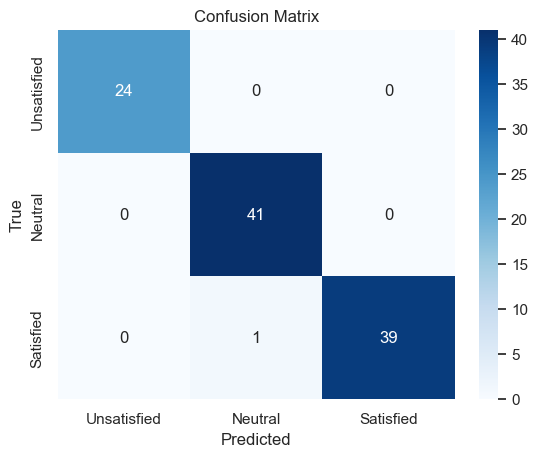

In [39]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Unsatisfied', 'Neutral', 'Satisfied'],
            yticklabels=['Unsatisfied', 'Neutral', 'Satisfied'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()